In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
ti_seq = np.array([*list(range(50, 400, 25)),
                       *list(range(400, 1000, 10)),
                       1000, 1030, 1050, 1080, 1100, 1130, 1150, 1180, 1200, 1230, 1250, 1280, 1300, 1330, 1350, 1380,
                       1400, 1450, 1500, 1550, 1600, 1650, 1700,
                       1800, 1900, 2000, 2100, 2200, 2300, 2500, 3000], dtype=float)

In [9]:
file = open("data/1111111111_15s_ep2d_se_til_shlomi_50-3000_2m2ISO_cor_PAT2_TE22_TR30k.nii.gz.txt", "r")
lines = file.readlines()[2:]
sig = [float(x.split('\t')[1]) for x in lines]

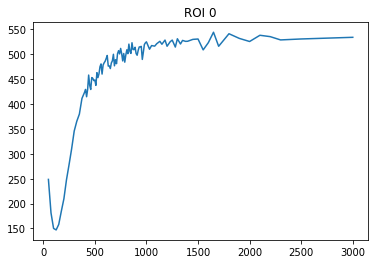

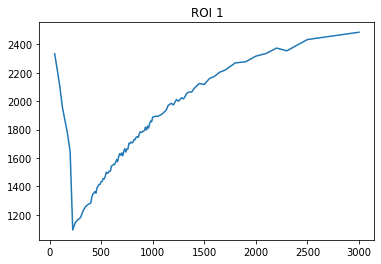

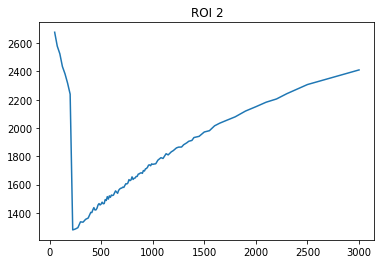

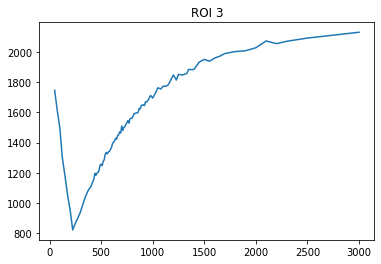

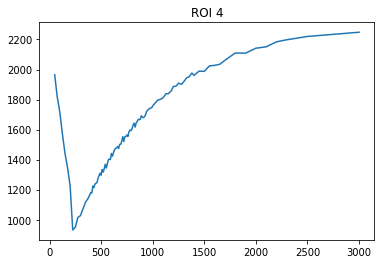

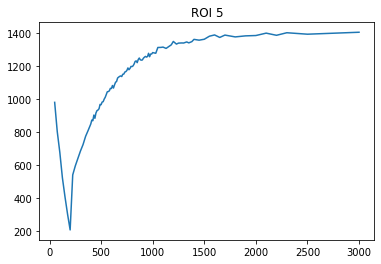

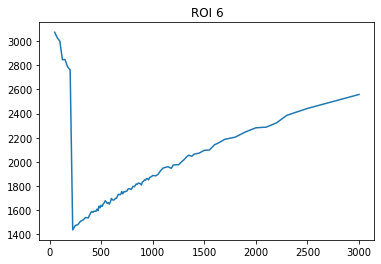

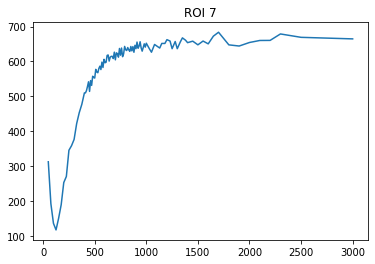

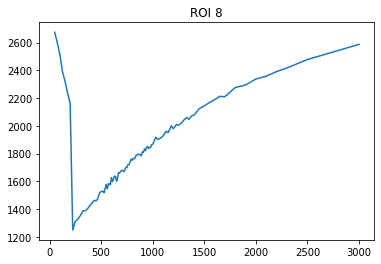

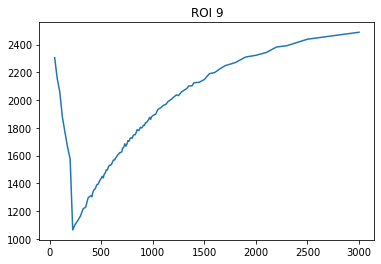

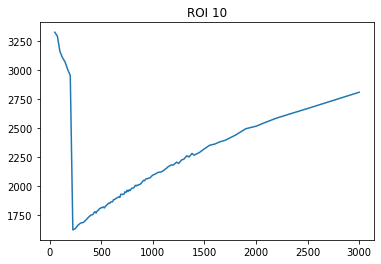

In [10]:
for i in range(11):
    plt.plot(ti_seq, sig[105*i:105*(i+1)])
    plt.title("ROI {}".format(i))
    # plt.ylim(0, 3100)
    plt.savefig("data/graphs/roi/{}".format(i))
    plt.show()

